In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importing DATASET 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [5]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


# Visualising the dataset

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

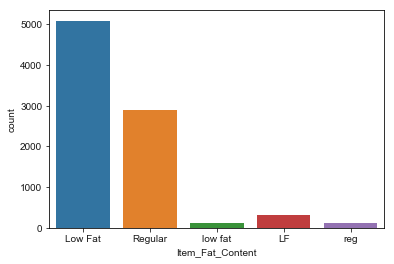

In [8]:
sns.countplot(x='Item_Fat_Content',data=train)
sns.set(rc={'figure.figsize':(4.7,6.27)})


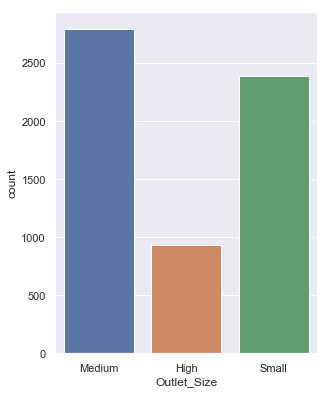

In [9]:
sns.countplot(x='Outlet_Size',data=train)
sns.set(rc={'figure.figsize':(4.7,6.27)})


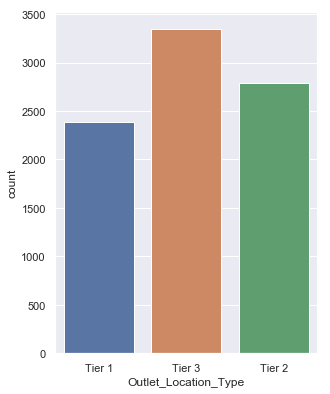

In [10]:
sns.countplot(x='Outlet_Location_Type',data=train)
sns.set(rc={'figure.figsize':(4.7,6.27)})


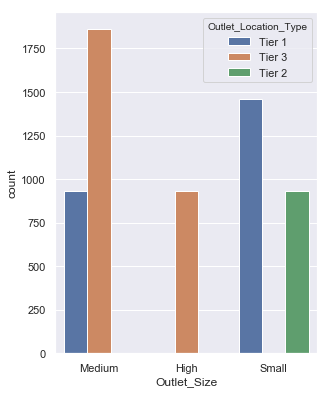

In [11]:
sns.countplot(x='Outlet_Size',hue='Outlet_Location_Type',data=train)
sns.set(rc={'figure.figsize':(4.7,6.27)})


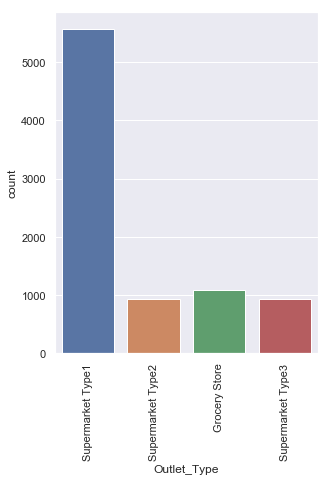

In [12]:
ax=sns.countplot(x='Outlet_Type',data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(2.6,6.27)})


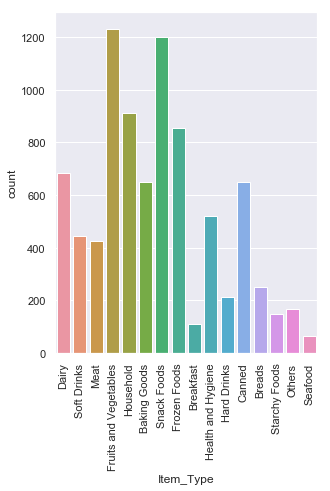

In [70]:
ax=sns.countplot(x='Item_Type',data=train)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.set(rc={'figure.figsize':(2.6,6.27)})



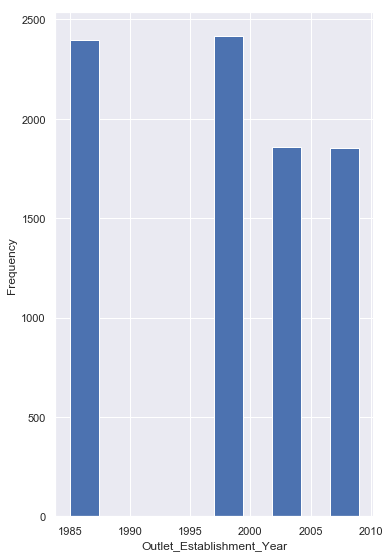

In [14]:
plot=train['Outlet_Establishment_Year'].plot.hist()
plot.set_xlabel('Outlet_Establishment_Year')
sns.set(rc={'figure.figsize':(4.7,6.27)})


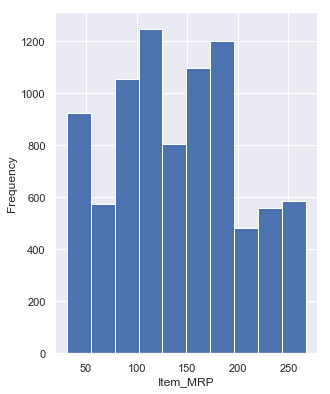

In [15]:
plot=train['Item_MRP'].plot.hist()
plot.set_xlabel('Item_MRP')
sns.set(rc={'figure.figsize':(4.7,6.27)})


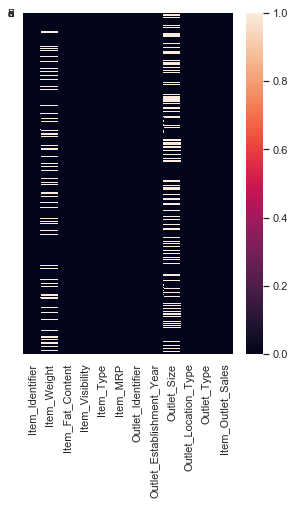

In [16]:
sns.heatmap(train.isnull(),yticklabels='False')
sns.set(rc={'figure.figsize':(4.7,6.27)})


# Data preprocessing

In [17]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train1=pd.get_dummies(train["Item_Fat_Content"])
test1=pd.get_dummies(test["Item_Fat_Content"])
train1.head(5)
#to convert Item_Fat_Content into categories.

,LF,Low Fat,Regular,low fat,reg
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [19]:
train3=pd.get_dummies(train["Outlet_Type"])
test3=pd.get_dummies(test["Outlet_Type"])
#to convert Item_Fat_Content into categories.
train3.head(5)

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [20]:
train2=pd.get_dummies(train["Outlet_Location_Type"])
test2=pd.get_dummies(test["Outlet_Location_Type"])
#to convert Item_Fat_Content into categories.
train2.head(5)

,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [21]:
train.drop(["Item_Fat_Content","Outlet_Location_Type","Outlet_Type",'Item_Weight','Outlet_Size'],axis=1,inplace=True)
test.drop(["Item_Fat_Content","Outlet_Location_Type","Outlet_Type",'Item_Weight','Outlet_Size'],axis=1,inplace=True)

In [22]:
train.head(2)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,3735.1380
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228


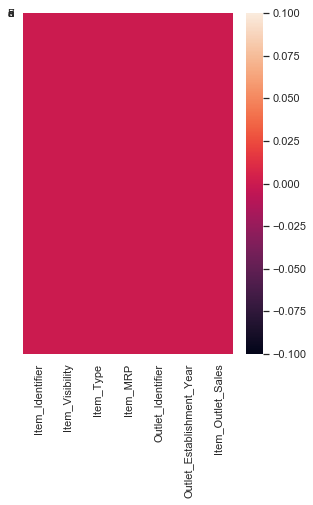

In [23]:
sns.heatmap(train.isnull(),yticklabels='False')

In [24]:
train_data=pd.concat([train,train1,train2,train3],axis=1)
train_data.head(5)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,LF,Low Fat,Regular,low fat,reg,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,1,0,0,0,1,0,0
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,0,1,0,0,1,0
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,1,0,0,0,1,0,0
3,FDX07,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,1,1,0,0,0
4,NCD19,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,0,0,0,0,0,1,0,1,0,0


In [25]:
test_data=pd.concat([test,test1,test2,test3],axis=1)
test_data.head(3)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,LF,Low Fat,Regular,low fat,reg,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDW58,0.007565,Snack Foods,107.8622,OUT049,1999,0,1,0,0,0,1,0,0,0,1,0,0
1,FDW14,0.038428,Dairy,87.3198,OUT017,2007,0,0,0,0,1,0,1,0,0,1,0,0
2,NCN55,0.099575,Others,241.7538,OUT010,1998,0,1,0,0,0,0,0,1,1,0,0,0


In [26]:
train_data.head(5)

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,LF,Low Fat,Regular,low fat,reg,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,1,0,0,0,1,0,0
1,DRC01,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,0,1,0,0,1,0
2,FDN15,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,1,0,0,0,1,0,0
3,FDX07,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,1,1,0,0,0
4,NCD19,0.000000,Household,53.8614,OUT013,1987,994.7052,0,1,0,0,0,0,0,1,0,1,0,0


In [27]:
train_data.isnull().sum()

Item_Identifier              0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
LF                           0
Low Fat                      0
Regular                      0
low fat                      0
reg                          0
Tier 1                       0
Tier 2                       0
Tier 3                       0
Grocery Store                0
Supermarket Type1            0
Supermarket Type2            0
Supermarket Type3            0
dtype: int64

In [28]:
train_data['Item_Outlet_Sales']=train_data['Item_Outlet_Sales'].astype('int64')


In [29]:
x=pd.get_dummies(train_data['Item_Type'])

In [30]:
train_data=pd.concat([x,train_data],axis=1,)


In [31]:
train_data.drop('Item_Type',axis=1,inplace=True)

In [32]:
train_data['Low Fat']=train_data['Low Fat']+ train_data['LF']+ train_data['low fat']

In [33]:
train_data['Regular']=train_data['Regular']+ train_data['reg']


In [34]:
train_data.drop('reg',axis=1,inplace=True)
train_data.drop(['LF','low fat'],axis=1,inplace=True)


In [35]:
train_data.dtypes

Baking Goods                   uint8
Breads                         uint8
Breakfast                      uint8
Canned                         uint8
Dairy                          uint8
Frozen Foods                   uint8
Fruits and Vegetables          uint8
Hard Drinks                    uint8
Health and Hygiene             uint8
Household                      uint8
Meat                           uint8
Others                         uint8
Seafood                        uint8
Snack Foods                    uint8
Soft Drinks                    uint8
Starchy Foods                  uint8
Item_Identifier               object
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales              int64
Low Fat                        uint8
Regular                        uint8
Tier 1                         uint8
Tier 2                         uint8
Tier 3                         uint8
G

In [36]:
(train_data['Item_Outlet_Sales'].max(),train_data['Item_Outlet_Sales'].min())


(13086, 33)

In [37]:
train_data.shape

(8523, 31)

In [38]:
#The data not being categorical was used through different models. 
#The accuracy obtained was highly less than required. Therefore we then used PANDAS library to convert columns
#into categorical data: 

#We used FOR LOOP to convert our prediction into categorical as every input we used was categorical.
#This will help model to predict more accurately.

In [39]:
for i in range(1,6):
    name= 'Item_Outlet_Sales' +str(i)
    train_data[name]= (2500*(i-2) <= train_data['Item_Outlet_Sales']) & (train_data['Item_Outlet_Sales']<=2500*(i-1))
    train_data[name]=train_data[name].astype('int64')
    train_data[name]=train_data[name].replace(1,i-1)


In [40]:
train_data.shape

(8523, 36)

In [41]:
train_data['Item_Outlet_Sales_discrete']=train_data[train_data.columns[31:36]].sum(axis=1,skipna=True)

In [42]:
train_data.drop(train_data.iloc[:,31:36],axis=1,inplace=True)

In [43]:
train_data.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [44]:
train_data.head(4)

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Low Fat,Regular,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales_discrete
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1


In [45]:
(train_data['Item_MRP'].min(),train_data['Item_MRP'].max())

(31.29, 266.8884)

In [46]:
train_data.shape

(8523, 31)

In [47]:
#We used FOR LOOP to convert Item_MRP into categorical as mostly inputs we used are categorical.
#This will help model to predict more accurately.

In [48]:
for i in range(1,6):
    name= 'Item_MRP' +str(i)
    train_data[name]= (46*(i-2) <= train_data['Item_MRP']) & (train_data['Item_MRP']<=46*(i-1))
    train_data[name]=train_data[name].astype('int64')
    train_data[name]=train_data[name].replace(1,i-1)


In [49]:
train_data.shape

(8523, 36)

In [50]:
train_data['Item_MRP_net']=train_data[train_data.columns[31:36]].sum(axis=1,skipna=True)

In [51]:
train_data.shape

(8523, 37)

In [52]:
train_data.drop(train_data.iloc[:,31:36],axis=1,inplace=True)

In [53]:
train_data.head(4)

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,...,Regular,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Outlet_Sales_discrete,Item_MRP_net
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,2
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,4
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,4


In [54]:
train_data.drop('Item_MRP',axis=1,inplace=True)

In [55]:
train_data.columns

Index([u'Baking Goods', u'Breads', u'Breakfast', u'Canned', u'Dairy',
       u'Frozen Foods', u'Fruits and Vegetables', u'Hard Drinks',
       u'Health and Hygiene', u'Household', u'Meat', u'Others', u'Seafood',
       u'Snack Foods', u'Soft Drinks', u'Starchy Foods', u'Item_Identifier',
       u'Item_Visibility', u'Outlet_Identifier', u'Outlet_Establishment_Year',
       u'Low Fat', u'Regular', u'Tier 1', u'Tier 2', u'Tier 3',
       u'Grocery Store', u'Supermarket Type1', u'Supermarket Type2',
       u'Supermarket Type3', u'Item_Outlet_Sales_discrete', u'Item_MRP_net'],
      dtype='object')

In [56]:
train_data.dtypes

Baking Goods                    uint8
Breads                          uint8
Breakfast                       uint8
Canned                          uint8
Dairy                           uint8
Frozen Foods                    uint8
Fruits and Vegetables           uint8
Hard Drinks                     uint8
Health and Hygiene              uint8
Household                       uint8
Meat                            uint8
Others                          uint8
Seafood                         uint8
Snack Foods                     uint8
Soft Drinks                     uint8
Starchy Foods                   uint8
Item_Identifier                object
Item_Visibility               float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Low Fat                         uint8
Regular                         uint8
Tier 1                          uint8
Tier 2                          uint8
Tier 3                          uint8
Grocery Store                   uint8
Supermarket 

# Data splitting

In [57]:
X=train_data.drop(['Item_Identifier','Item_Visibility','Outlet_Identifier','Item_Outlet_Sales_discrete'],axis=1)
y=train_data['Item_Outlet_Sales_discrete']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Applying Machine Learning Models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier

In [61]:
LR=LogisticRegression()
GB=GaussianNB()
KNN=neighbors.KNeighborsClassifier(n_neighbors=8)
DTC=DecisionTreeClassifier()

In [62]:
LR.fit(X_train,y_train)

/opt/anaconda3/envs/glv-evn/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/glv-evn/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
GB.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
KNN.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [65]:
DTC.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
y_predict1=LR.predict(X_test)
y_predict2=GB.predict(X_test)
y_predict3=KNN.predict(X_test)
y_predict4=DTC.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score


In [68]:
accuracy_score1=accuracy_score(y_test,y_predict1)
accuracy_score2=accuracy_score(y_test,y_predict2)
accuracy_score3=accuracy_score(y_test,y_predict3)
accuracy_score4=accuracy_score(y_test,y_predict4)

In [69]:
(accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4)

(0.6434017595307918,
 0.1941348973607038,
 0.6838709677419355,
 0.6997067448680352)

# Conclusion:
*Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.69 which means our model is approx. 70% accurate.
    The beat prediction we got from DECISION TREE MODEL as we got HIGHEST ACCURACY their.
    
**The ACCURACY CAN BE INCREASED AFTER DOING SOME MORE MODIFICATION**